In [6]:
import cv2
import numpy as np

img = np.random.randint(0, 255, (96, 96, 3), dtype='uint8')

In [7]:
print(img.dtype)

uint8


In [8]:
resized_obs = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)

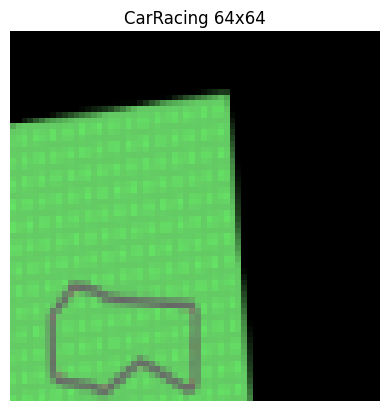

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import gymnasium as gym
env = gym.make("CarRacing-v3", render_mode="rgb_array", lap_complete_percent=0.95, domain_randomize=False)

plt.ion()
obs, info = env.reset()
fig, ax = plt.subplots()
img = ax.imshow(obs)
ax.set_title("CarRacing 64x64")
plt.axis('off')

for i in range(1):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(np.array([-0.02, 0.4, 0.]))
    obs = obs[:84, :, :]
    resized_obs = cv2.resize(obs, (64, 64), interpolation=cv2.INTER_AREA)
    img.set_data(resized_obs)
    plt.draw()
    plt.pause(0.001)
    if terminated or truncated:
        obs, info = env.reset()
        
plt.ioff()
plt.close()
env.close()
    